Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [4]:
library(tidymodels)
getwd()

[1] "/home/studio-lab-user/unit-5-assignment-jasonh7702"

The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [7]:
diabetes = readr::read_csv('/home/studio-lab-user/unit-5-assignment-jasonh7702/diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [8]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 5, 10, 4, 10, 3, 8, 1, 5, 5, 3, 10, 4, 11, 3,…
$ Glucose                  <dbl> 116, 115, 110, 139, 126, 99, 97, 117, 109, 88…
$ BloodPressure            <dbl> 74, 0, 92, 80, 88, 84, 66, 92, 75, 58, 78, 60…
$ SkinThickness            <dbl> 0, 0, 0, 0, 41, 0, 15, 0, 26, 11, 31, 33, 0, …
$ Insulin                  <dbl> 0, 0, 0, 0, 235, 0, 140, 0, 0, 54, 0, 192, 0,…
$ BMI                      <dbl> 25.6, 35.3, 37.6, 27.1, 39.3, 35.4, 23.2, 34.…
$ DiabetesPedigreeFunction <dbl> 0.201, 0.134, 0.191, 1.441, 0.704, 0.388, 0.4…
$ Age                      <dbl> 30, 29, 30, 57, 27, 50, 22, 38, 60, 22, 45, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The variable outcome is suitable since the value can either be 0 or 1 indicating a binary variable, which can be used as a dependent variable.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test            |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.


  0   1 
375 201 

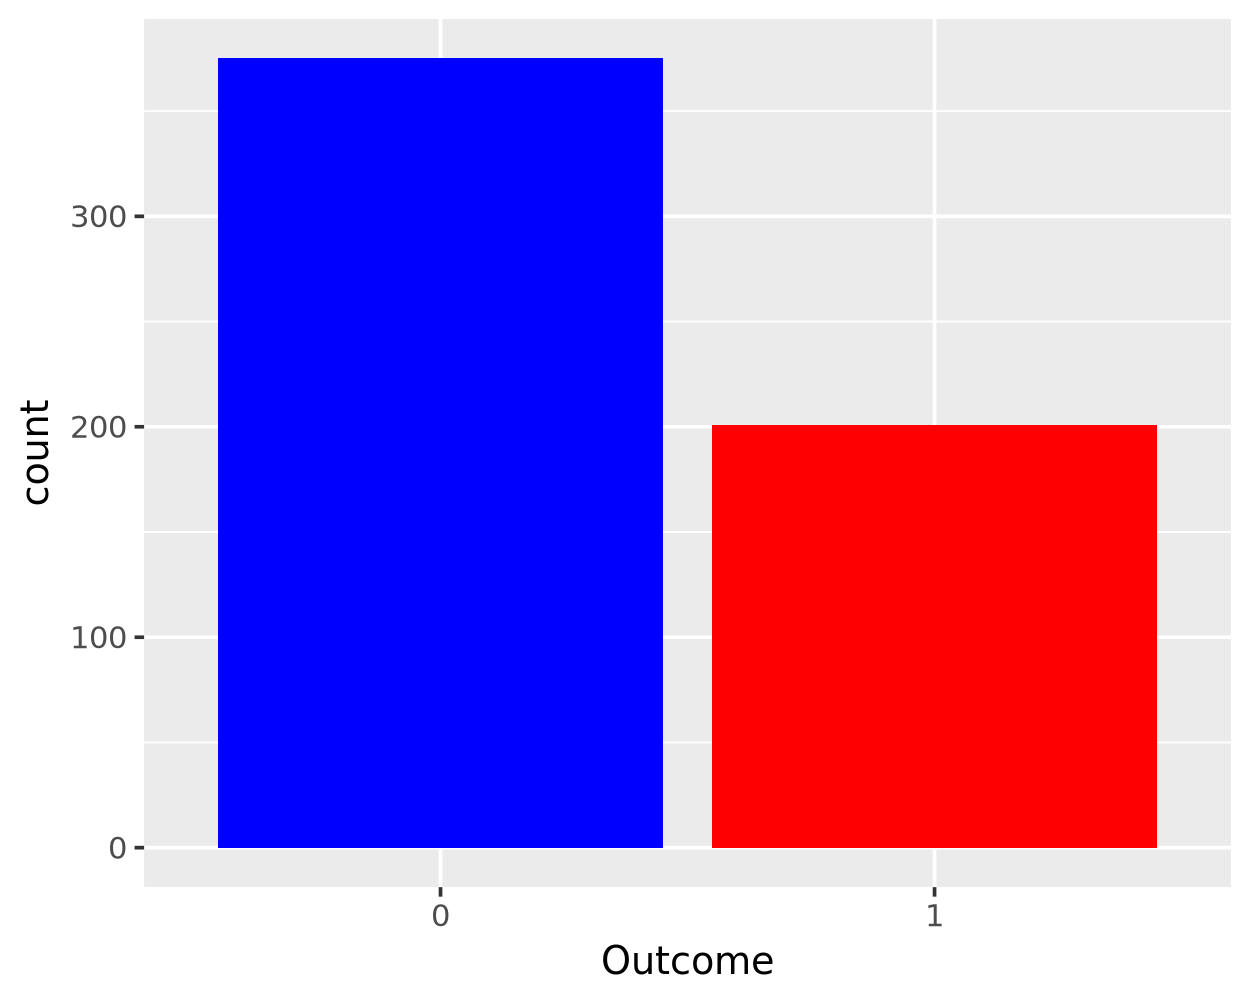

In [9]:
ggplot(diabetes_train, aes(x = Outcome)) +
    geom_bar(fill = c("blue", "red"))

table(diabetes_train$Outcome)

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

No, the data is not balanced. There are 174 more 0 outcomes than 1.


Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [10]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,116.0
0,BMI,25.6
0,Glucose,115.0
0,BMI,35.3
0,Glucose,110.0
0,BMI,37.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

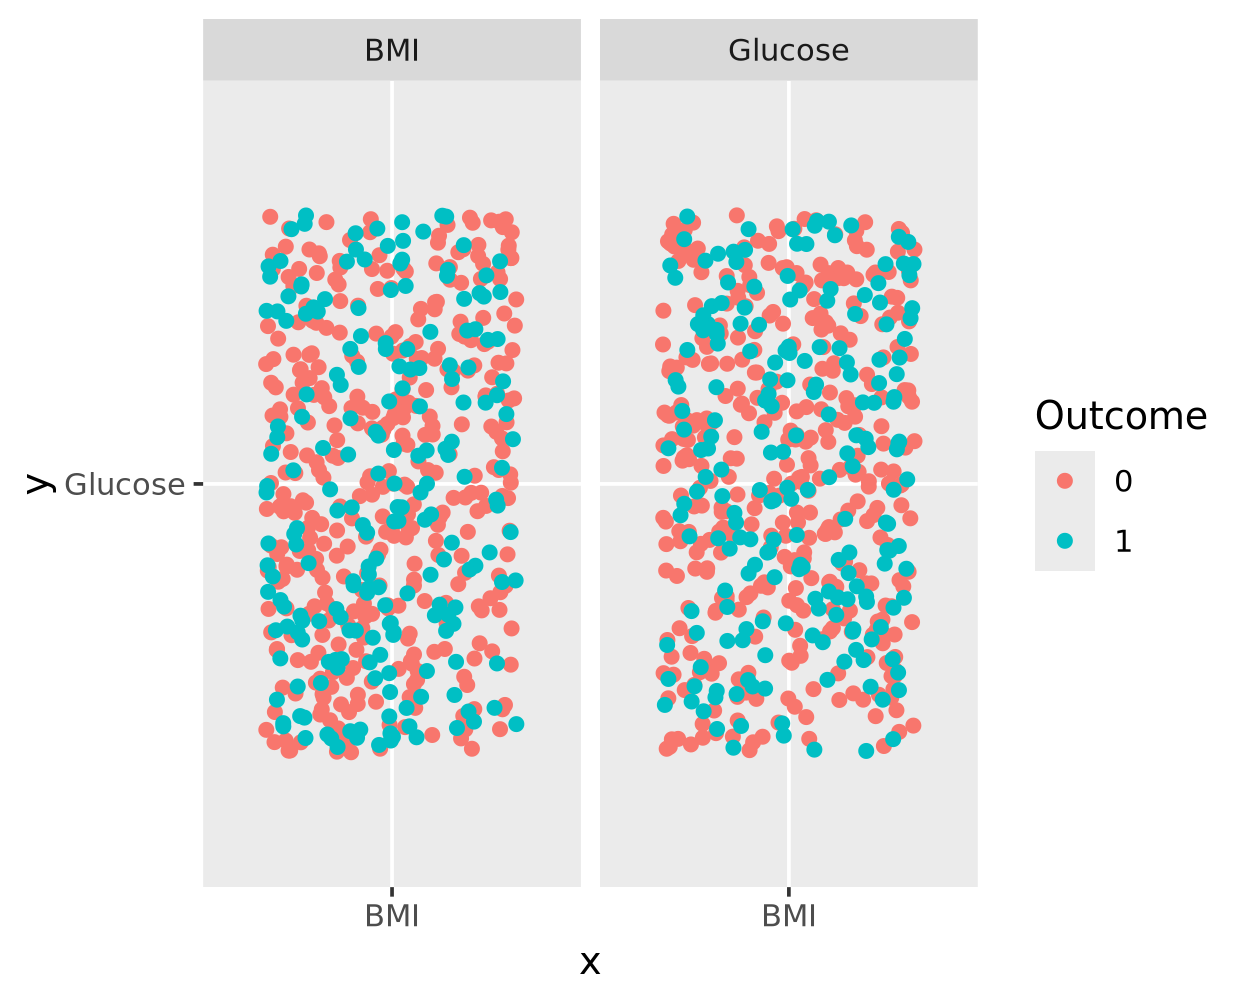

In [35]:
ggplot(plot_df, aes(x = "BMI", y = "Glucose", color = Outcome)) + 
  geom_jitter() + 
  facet_wrap(~name, ncol = 2, scales = 'free_x')

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

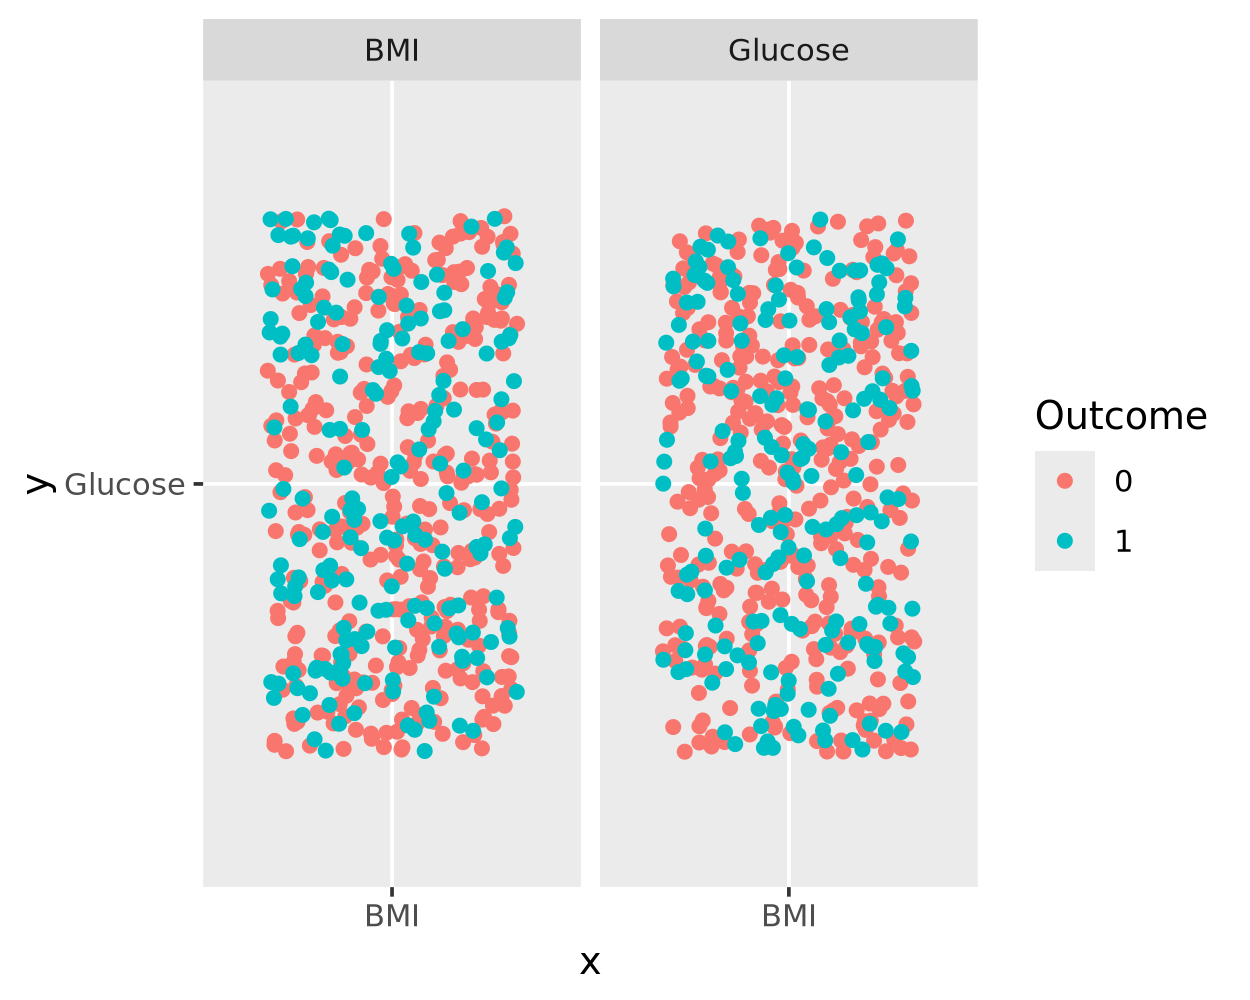

In [11]:
ggplot(plot_df, aes(x = "BMI", y = "Glucose", color = Outcome)) + 
  geom_jitter() + 
  facet_wrap(~name, ncol = 2)

The facets will share the same x-axis scale. In comparison with 'free_x' each facet can have its own x-axis range tailored to the specific data in that facet.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [12]:
fit <- glm(Outcome ~ BMI + Glucose, data = diabetes_train, family = binomial())

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [13]:
diabetes_test_wPred <- augment(fit, newdata = diabetes_test)
diabetes_test_wPred

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,.fitted
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,85,66,29,0,26.6,0.351,31,0,-2.5711893
1,89,66,23,94,28.1,0.167,21,0,-2.3114103
3,78,50,32,88,31.0,0.248,26,1,-2.4914248
2,197,70,45,543,30.5,0.158,53,1,1.8044319
8,125,96,0,0,0.0,0.232,54,1,-3.1378288
7,107,74,0,0,29.6,0.254,31,1,-1.5417618
1,103,30,38,83,43.3,0.183,33,0,-0.6453068
9,119,80,35,0,29.0,0.263,29,1,-1.1503716
11,143,94,33,146,36.6,0.254,51,1,0.3018074


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [18]:
diabetes_test_wPred = augment(fit, new_data = diabetes_test)

diabetes_test_wPred <- diabetes_test_wPred %>%
  mutate(.pred_class = ifelse(.fitted > 0.5, 1, 0)) %>%
  mutate(Outcome = factor(Outcome, levels = c(0, 1)),
         .pred_class = factor(.pred_class, levels = c(0, 1)))

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 352 120
         1  23  81

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

1.

